In [92]:
#Importing the data labelled as excel file
import pandas as pd
data=pd.read_excel("DLI_CO_DATA.xlsx")
data=data.iloc[:,[0,1,2,3,4,5,6]]
#Checking the first five rows of data

In [93]:
# Deriving the two columns: Date/Time and CO
data=data.iloc[:,[0,4]]
data.columns=['Date','CO']
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('D')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
mean_value=data['CO'].mean()
data['CO'].fillna(value=data['CO'].mean(), inplace=True)
data.isnull().values.any()
data.head()

,CO,date
Date,,
2020-01-01,894.455633,2020-01-01
2020-01-02,577.588292,2020-01-02
2020-01-03,402.879125,2020-01-03
2020-01-04,539.677329,2020-01-04
2020-01-05,704.075854,2020-01-05


In [94]:
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#Generating timeseries data based on the two lists
data= pd.Series(CO,Date)
CO= pd.Series(CO)
data.index = data.index.to_timestamp()


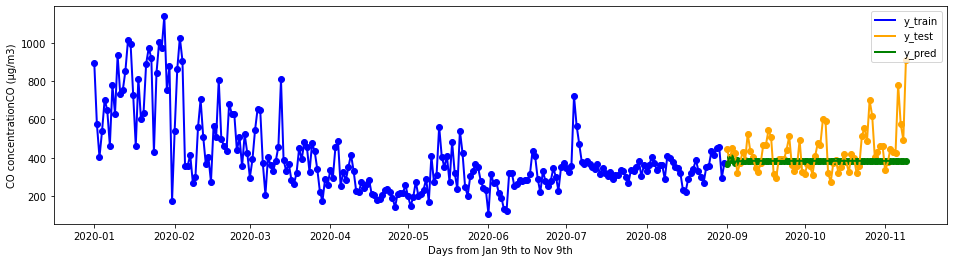

0.18350412998673185

In [96]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(16,4))

# Load/split your data
y = CO
ts=70
y_train, y_test = temporal_train_test_split(y, test_size=ts)
model = pm.auto_arima(y_train, seasonal=False, m=0)
y_pred=model.predict(y_test.shape[0])

y_train_ind, y_test_ind = temporal_train_test_split(data.index, test_size=ts)
#CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train_ind,y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,y_train, color='blue')
plt.plot(y_test_ind,y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,y_test, color='orange')
plt.plot(y_test_ind,y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
ind=[i for i in range(244,314)]
y_pred=pd.Series(list(y_pred),ind)
smape_loss(y_pred, y_test)
